# Choosing Labels for Evaluation

- Author(s): Akshat Gurbuxani and Abhishek Varshney
- Description: This code is used to decide the labels for evaluation of models.

# Importing Libraries

In [51]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Configurations

In [52]:
main_path = "data/neurite-oasis.2d.v1.0/"
file_name = "slice_seg24.nii.gz"
labels_total = 24

# Labels and Categories

In [53]:
label_category = {}
# Open the text file
file_path = 'seg24_labels.txt'  # Specify the path to your text file
with open(file_path, 'r') as file:
    # Read all lines in the file
    lines = file.readlines()
    
    # Process each line
    for line in lines[3:]:
        # Split the line into individual values based on spaces
        values = line.split()
        # Process the values as needed
        label, category = values[0], values[1]
        label_category[int(label)] = category
        

# Utitlity Functions

In [54]:
def get_sorted_average_values(dict_obj):

    # Average values
    tolerance = 1e-10
    average_values = []
    labels = []
    for label, area in dict_obj.items():
        labels.append(label)

        # Filter out zeros from the list
        non_zero_values = [value for value in area if value > tolerance]
        # Calculate the mean of non-zero values
        mean = sum(non_zero_values) / len(non_zero_values) if non_zero_values else 0

        average_values.append(mean)
        
    # Sort the labels and average values together based on average values
    sorted_data = sorted(zip(average_values, labels))

    # Unpack sorted data into separate lists
    sorted_average_values, sorted_labels = zip(*sorted_data)

    return sorted_average_values, sorted_labels

In [55]:
def visualize_segmented_regions(sorted_average_values, sorted_labels, threshold1, threshold2, label_category, title_name, xlabel, xlimit_max, fig_name):
    # Create horizontal bar plot with colors based on thresholds
    plt.figure(figsize=(10, 8))
    colors = []
    for value in sorted_average_values:
        if value < threshold2:
            colors.append('#0000FF')  # Color for values above threshold2
        elif value > threshold2 and value < threshold1:
            colors.append('#00FF00')  # Color for values between threshold1 and threshold2
        else:
            colors.append('#FF0000')  # Color for values below threshold1
    plt.barh(range(1, 25), sorted_average_values, color=colors, edgecolor='black')

    # Add labels to the bars with improved positioning and style
    for i, value in enumerate(sorted_average_values):
        plt.text(value + xlimit_max/50, i + 1, f"{label_category[sorted_labels[i]]} - Label {sorted_labels[i]}", ha='left', va='center', color='black', fontsize=15)

    # Set plot title and labels with a touch of style
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel('Labels', fontsize=12, fontweight='bold')
    plt.title(title_name, fontsize=14, fontweight='bold')

    # Adjust the position of x-ticks
    plt.xticks(np.arange(0, xlimit_max, 0.1))
    plt.xlim(0, xlimit_max)

    # Customize the grid lines
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Add a sexy background color
    plt.gca().set_facecolor('#FAEBD7')

    # Add a sexy border around the plot
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('grey')
    plt.gca().spines['left'].set_color('grey')

    # Create legend
    legend_labels = ['Small', 'Medium', 'Large']
    legend_colors = ['#0000FF', '#00FF00', '#FF0000']
    legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
    plt.legend(legend_handles, legend_labels, loc='lower right', fontsize=20)

    # Save plot as PDF
    plt.savefig(fig_name, dpi=300)

    # Show plot
    plt.tight_layout()
    plt.show()


# Pixel Area

In [56]:
label_areas_dict = {label: [] for label in range(1, labels_total+1)}

def calculate_label_areas(file_path):

    img = nib.load(file_path)
    data_array = img.get_fdata().astype(np.int32)

    for label in range(1, labels_total+1):

        label_count = np.sum(data_array == label)

        label_count = round(label_count / (data_array.shape[0] * data_array.shape[1]), 6)
        
        label_areas_dict[label].append(label_count)

In [57]:
for folder_name in os.listdir(main_path):
    folder_path = os.path.join(main_path, folder_name)
    
    if os.path.isdir(folder_path):
        nifti_file_path = os.path.join(folder_path, file_name)
        
        if os.path.exists(nifti_file_path):
            calculate_label_areas(nifti_file_path)

for label, areas_list in label_areas_dict.items():
    print(f"Label {label}: {areas_list}")

Label 1: [0.07985, 0.082943, 0.083073, 0.077376, 0.081771, 0.083105, 0.088411, 0.074512, 0.083789, 0.091797, 0.074544, 0.087272, 0.087663, 0.079362, 0.078451, 0.087728, 0.081966, 0.078874, 0.07168, 0.092188, 0.088672, 0.076042, 0.072461, 0.080501, 0.085156, 0.080664, 0.078874, 0.088021, 0.080957, 0.081348, 0.083366, 0.080566, 0.073047, 0.086133, 0.086491, 0.077897, 0.076725, 0.081478, 0.08584, 0.079199, 0.069857, 0.089355, 0.086035, 0.076302, 0.078548, 0.074056, 0.074447, 0.090885, 0.077799, 0.071777, 0.079948, 0.083008, 0.079232, 0.080827, 0.088835, 0.087988, 0.083626, 0.076595, 0.078776, 0.085807, 0.078678, 0.087207, 0.089648, 0.079004, 0.081152, 0.080176, 0.071973, 0.079915, 0.060547, 0.089486, 0.084635, 0.079492, 0.081576, 0.079134, 0.080046, 0.081901, 0.076855, 0.084863, 0.079199, 0.065299, 0.086165, 0.088932, 0.070996, 0.080501, 0.094759, 0.084668, 0.081348, 0.074447, 0.077507, 0.080599, 0.075911, 0.078906, 0.080176, 0.084798, 0.076009, 0.092904, 0.082064, 0.077897, 0.078646, 0.0

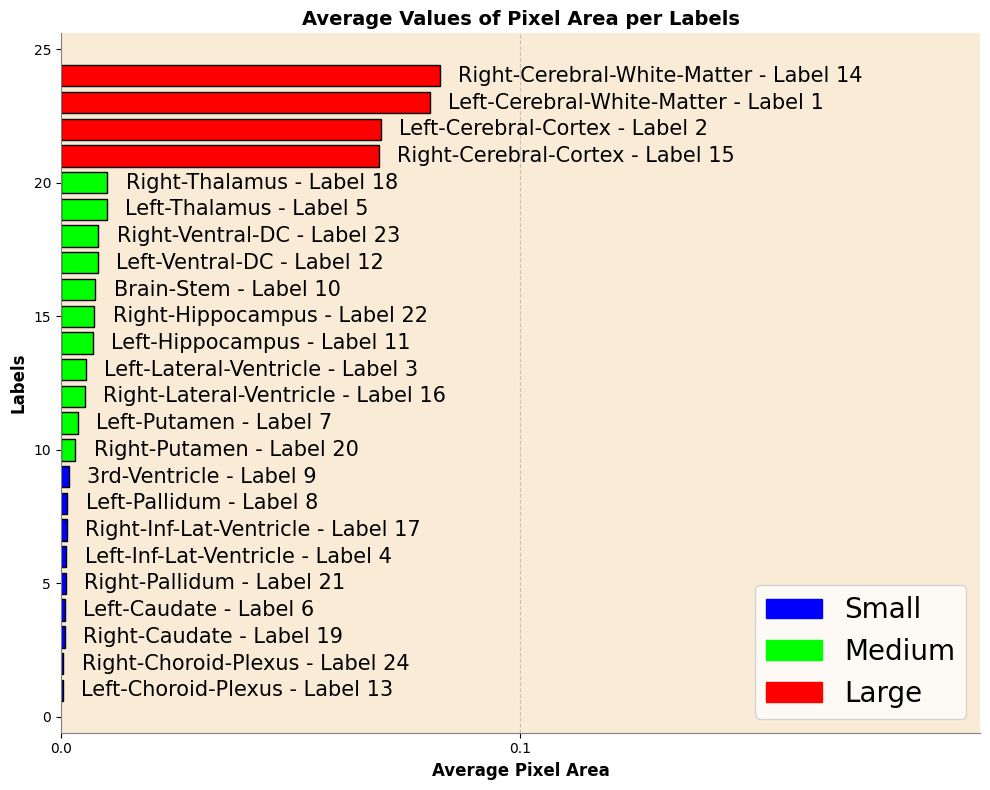

In [58]:
sorted_average_values, sorted_labels = get_sorted_average_values(label_areas_dict)
visualize_segmented_regions(sorted_average_values, sorted_labels
                            , threshold1 = 0.06, threshold2 = 0.002
                            , label_category = label_category
                            , title_name = 'Average Values of Pixel Area per Labels'
                            , xlabel =  'Average Pixel Area', xlimit_max = 0.2
                            , fig_name = 'size_roi_pixel_count.pdf')

# BBox Area

In [59]:

bbox_dict = {label: [] for label in range(1, labels_total + 1)}

def find_bbox_coordinates(nifti_file_path):

    img = nib.load(nifti_file_path)

    data_array = img.get_fdata().astype(np.int32)

    for label in range(1, labels_total + 1):

        coords = np.argwhere(data_array == label)

        if len(coords) == 0:
            bbox_dict[label].append(0)
            continue
        
        min_x, min_y = np.min(coords[:, 1]), np.min(coords[:, 0])
        max_x, max_y = np.max(coords[:, 1]), np.max(coords[:, 0])

        width = max_x - min_x + 1
        height = max_y - min_y + 1

        bbox_area = width * height
        bbox_area = round(bbox_area / (data_array.shape[0] * data_array.shape[1] ), 6)
        bbox_dict[label].append(bbox_area)

In [60]:
for folder_name in os.listdir(main_path):
    folder_path = os.path.join(main_path, folder_name)

    if os.path.isdir(folder_path):
        nifti_file_path = os.path.join(folder_path, file_name)

        if os.path.exists(nifti_file_path):
            find_bbox_coordinates(nifti_file_path)

            

for label, bbox_list in bbox_dict.items():
    print(f"Label {label}: {bbox_list}")

Label 1: [0.242773, 0.232747, 0.239062, 0.241211, 0.239095, 0.245443, 0.239583, 0.2264, 0.241667, 0.244271, 0.248633, 0.23125, 0.227637, 0.229167, 0.247559, 0.248145, 0.239095, 0.249219, 0.22806, 0.258301, 0.244271, 0.244922, 0.221484, 0.258301, 0.235417, 0.239909, 0.253516, 0.248633, 0.229167, 0.261198, 0.256771, 0.253809, 0.215951, 0.229167, 0.256055, 0.231185, 0.232031, 0.242773, 0.255208, 0.239095, 0.230632, 0.253516, 0.251367, 0.238477, 0.239909, 0.210417, 0.230632, 0.249219, 0.232747, 0.241211, 0.229883, 0.250814, 0.254557, 0.23418, 0.245703, 0.234863, 0.236979, 0.222917, 0.231738, 0.23125, 0.224284, 0.262793, 0.257812, 0.236979, 0.241211, 0.24349, 0.232031, 0.232031, 0.21875, 0.262793, 0.249674, 0.231185, 0.255208, 0.23125, 0.225586, 0.238477, 0.241211, 0.240625, 0.225586, 0.228516, 0.232031, 0.2264, 0.239095, 0.23125, 0.249219, 0.225586, 0.229004, 0.236979, 0.234863, 0.255176, 0.237891, 0.243327, 0.226367, 0.227637, 0.25013, 0.244922, 0.233789, 0.227083, 0.229688, 0.229688, 0.2

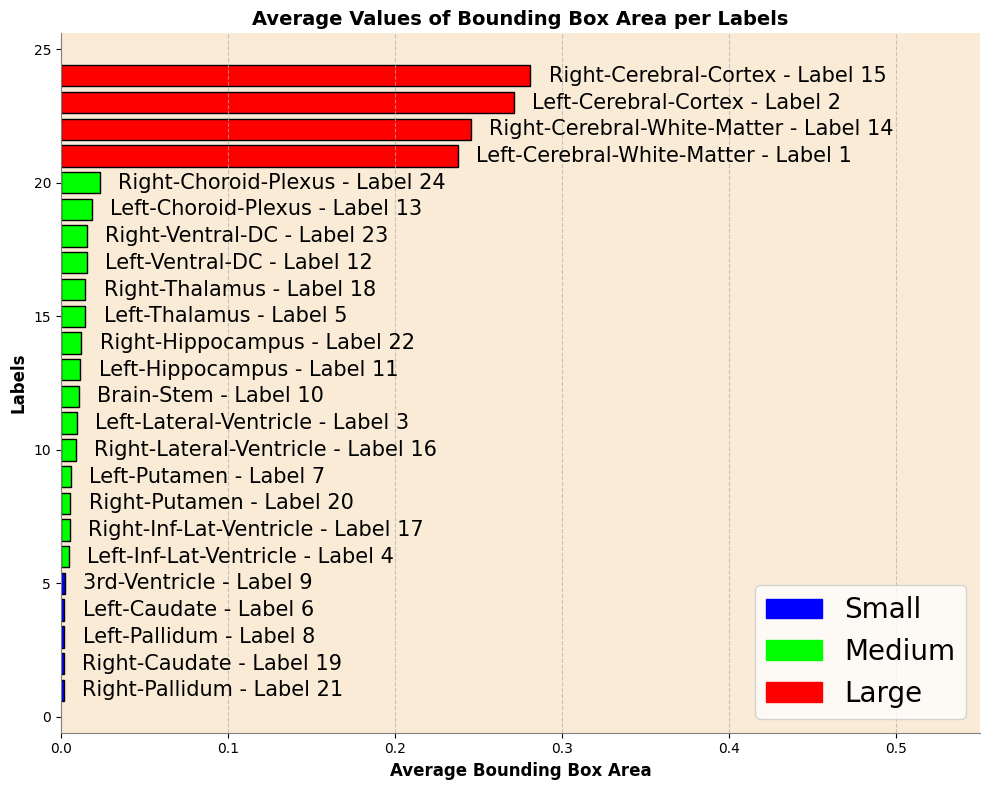

In [61]:
sorted_average_values, sorted_labels = get_sorted_average_values(bbox_dict)
visualize_segmented_regions(sorted_average_values, sorted_labels
                            , threshold1 = 0.2, threshold2 = 0.004
                            , label_category = label_category
                            , title_name = 'Average Values of Bounding Box Area per Labels'
                            , xlabel =  'Average Bounding Box Area', xlimit_max = 0.55
                            , fig_name = 'size_roi_bbox_area.pdf')

# Notes

- **'Right-Choroid-Plexus' and 'Left-Choroid-Plexus': These categories exhibit a scarcity of pixels, yet their bounding boxes span a larger area. This phenomenon arises due to their sparse distribution and distant positioning.**